In [63]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Params
lr = 0.001
batch_size = 10000
SAMPLING_NUM = 1000000
COST_THRESHOLD = 2.78937307e-04

In [2]:
# INIT
params = np.zeros(shape = (3,1))
params[0][0] = 3
params[1][0] = 1
params[2][0] = 2
x_data = np.ones(shape=(SAMPLING_NUM,3)) # 1, x1, x2
y_data = np.zeros(shape = (SAMPLING_NUM, 1)) # y
noise = np.zeros(shape = (SAMPLING_NUM, 1))
noise[:,0] = np.random.normal(0, 1.414, SAMPLING_NUM)
x_data[:,1] = np.random.normal(3, 2, SAMPLING_NUM)
x_data[:,2] = np.random.normal(-1, 2, SAMPLING_NUM)

In [3]:
y_data = np.dot(x_data, params)
# print('BEFORE: ',y_data)
# print('NOiSE: ', noise)
y_data = np.add(y_data, noise)
# print('AFTER: ', y_data)
print(params.T[0].shape)
print(x_data[0].shape)
print(y_data[0])
print(3/2)

(3,)
(3,)
[0.90603451]
1.5


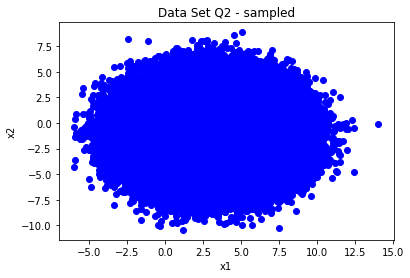

In [4]:
plt.title("Data Set Q2 - sampled") 
plt.xlabel("x1") 
plt.ylabel("x2") 
plt.plot(x_data[:,1], x_data[:,2], "ob")
plt.show()

In [17]:
def cost(x_data, y_data, params):
    sum = 0
    for i in range(y_data.shape[0]):
        sum = sum + ((1/y_data.shape[0])*(y_data[i]-np.dot(params, x_data[i]))**2)/2
    return sum

In [65]:
from os import system
from IPython.display import clear_output
def sgd_main(x_data, y_data):
    m = int(y_data.shape[0])
    r = batch_size
    theta = np.ones(shape = (1, 3))
    epoch = 0
    while(cost(x_data, y_data, theta)>COST_THRESHOLD):
        p = 0
        while(p <= m):    
#             clear_output(wait=True)
            print('=================EPOCH %s=================' % epoch)
            for i in range(p, r+p):
                gradient = np.zeros(3)
                for j in range(3):
                    gradient[j] += ((y_data[i] - np.dot(theta, x_data[i])) * x_data[i][j])/r
                    theta[0][j] += lr * gradient[j]
            print('Batch %s out of %s batches\n' % (p/r, m/r))
            print(theta[0])
            p += r
            if(p == m):
                break
            validation_cost = 0
            if(p>0):
                for g in range(p-r,p):
                    validation_cost = validation_cost + ((1/r)*(y_data[g]-np.dot(theta, x_data[g]))**2)/2
            else:
                for g in range((m/r-2)*r,(m/r-1)*r):
                    validation_cost = validation_cost + ((1/r)*(y_data[g]-np.dot(theta, x_data[g]))**2)/2
            print('COST: %s \n' % validation_cost)
            if(validation_cost<COST_THRESHOLD/2):
#                 epoch += 1
                break
        epoch+=1

# Observation

# Report

In [66]:
sgd_main(x_data, y_data)

=================EPOCH 0=================
Batch 0.0 out of 100.0 batches

[1.00097439 1.00283364 1.0029337 ]
COST: [3.43904624] 

=================EPOCH 0=================
Batch 1.0 out of 100.0 batches

[1.00192819 1.00574518 1.00609439]
COST: [3.55336521] 

=================EPOCH 0=================
Batch 2.0 out of 100.0 batches

[1.00289812 1.00870527 1.00924931]
COST: [3.55274193] 

=================EPOCH 0=================
Batch 3.0 out of 100.0 batches

[1.00386862 1.01157003 1.01219842]
COST: [3.38827711] 

=================EPOCH 0=================
Batch 4.0 out of 100.0 batches

[1.0048683  1.01441552 1.01523066]
COST: [3.5082197] 

=================EPOCH 0=================
Batch 5.0 out of 100.0 batches

[1.00584897 1.01725883 1.01814696]
COST: [3.38864236] 

=================EPOCH 0=================
Batch 6.0 out of 100.0 batches

[1.00682471 1.02008631 1.02107567]
COST: [3.35260809] 

=================EPOCH 0=================
Batch 7.0 out of 100.0 batches

[1.00775832 1.022

Batch 63.0 out of 100.0 batches

[1.05331279 1.13979466 1.17899852]
COST: [2.66374436] 

=================EPOCH 0=================
Batch 64.0 out of 100.0 batches

[1.0540531  1.14145643 1.18167926]
COST: [2.69241058] 

=================EPOCH 0=================
Batch 65.0 out of 100.0 batches

[1.05476629 1.14300318 1.18425937]
COST: [2.60455641] 

=================EPOCH 0=================
Batch 66.0 out of 100.0 batches

[1.05545367 1.1444854  1.18674175]
COST: [2.56452356] 

=================EPOCH 0=================
Batch 67.0 out of 100.0 batches

[1.05617938 1.14606404 1.18931825]
COST: [2.62204502] 

=================EPOCH 0=================
Batch 68.0 out of 100.0 batches

[1.05686467 1.14748667 1.19180884]
COST: [2.54429702] 

=================EPOCH 0=================
Batch 69.0 out of 100.0 batches

[1.05758334 1.14900105 1.19429781]
COST: [2.57578487] 

=================EPOCH 0=================
Batch 70.0 out of 100.0 batches

[1.05828539 1.15048892 1.19675637]
COST: [2.554493

Batch 26.0 out of 100.0 batches

[1.09348699 1.2145629  1.32653979]
COST: [2.20979896] 

=================EPOCH 1=================
Batch 27.0 out of 100.0 batches

[1.09409751 1.21549587 1.32856201]
COST: [2.15927487] 

=================EPOCH 1=================
Batch 28.0 out of 100.0 batches

[1.09469812 1.2165047  1.33066165]
COST: [2.15986211] 

=================EPOCH 1=================
Batch 29.0 out of 100.0 batches

[1.09529868 1.21739122 1.33272793]
COST: [2.18257594] 

=================EPOCH 1=================
Batch 30.0 out of 100.0 batches

[1.09589786 1.21827273 1.33472573]
COST: [2.14344622] 

=================EPOCH 1=================
Batch 31.0 out of 100.0 batches

[1.09649535 1.21912884 1.33686245]
COST: [2.20097974] 

=================EPOCH 1=================
Batch 32.0 out of 100.0 batches

[1.09708088 1.22004789 1.33892653]
COST: [2.1349719] 

=================EPOCH 1=================
Batch 33.0 out of 100.0 batches

[1.09765469 1.22095738 1.34098558]
COST: [2.1240381

Batch 89.0 out of 100.0 batches

[1.12871571 1.25963714 1.44496034]
COST: [1.89704785] 

=================EPOCH 1=================
Batch 90.0 out of 100.0 batches

[1.12924327 1.26016524 1.44664114]
COST: [1.87135083] 

=================EPOCH 1=================
Batch 91.0 out of 100.0 batches

[1.12974846 1.26065062 1.4483583 ]
COST: [1.88125275] 

=================EPOCH 1=================
Batch 92.0 out of 100.0 batches

[1.13027632 1.26123491 1.45002387]
COST: [1.87613512] 

=================EPOCH 1=================
Batch 93.0 out of 100.0 batches

[1.13080127 1.26174303 1.45162417]
COST: [1.83364636] 

=================EPOCH 1=================
Batch 94.0 out of 100.0 batches

[1.13136257 1.26231784 1.4533052 ]
COST: [1.90999668] 

=================EPOCH 1=================
Batch 95.0 out of 100.0 batches

[1.1318895  1.26285038 1.45497162]
COST: [1.87325746] 

=================EPOCH 1=================
Batch 96.0 out of 100.0 batches

[1.13241698 1.26335336 1.45654597]
COST: [1.867195

Batch 52.0 out of 100.0 batches

[1.16166506 1.2889562  1.53934436]
COST: [1.69062065] 

=================EPOCH 2=================
Batch 53.0 out of 100.0 batches

[1.16218496 1.28939682 1.54069329]
COST: [1.72691376] 

=================EPOCH 2=================
Batch 54.0 out of 100.0 batches

[1.16270981 1.28984219 1.54201662]
COST: [1.71510128] 

=================EPOCH 2=================
Batch 55.0 out of 100.0 batches

[1.16323785 1.2902501  1.54337866]
COST: [1.74931379] 

=================EPOCH 2=================
Batch 56.0 out of 100.0 batches

[1.16375559 1.29064649 1.5447211 ]
COST: [1.73500272] 

=================EPOCH 2=================
Batch 57.0 out of 100.0 batches

[1.16427196 1.29101059 1.54598941]
COST: [1.67818369] 

=================EPOCH 2=================
Batch 58.0 out of 100.0 batches

[1.16477558 1.29137495 1.54731286]
COST: [1.70629837] 

=================EPOCH 2=================
Batch 59.0 out of 100.0 batches

[1.16530722 1.29177915 1.54860156]
COST: [1.693244

Batch 15.0 out of 100.0 batches

[1.1932638  1.30807207 1.61413867]
COST: [1.61490595] 

=================EPOCH 3=================
Batch 16.0 out of 100.0 batches

[1.19374794 1.30823296 1.61518702]
COST: [1.61823932] 

=================EPOCH 3=================
Batch 17.0 out of 100.0 batches

[1.19424669 1.30858617 1.61621309]
COST: [1.61049296] 

=================EPOCH 3=================
Batch 18.0 out of 100.0 batches

[1.19475116 1.30887209 1.61727459]
COST: [1.63303167] 

=================EPOCH 3=================
Batch 19.0 out of 100.0 batches

[1.19524514 1.30914727 1.61826078]
COST: [1.58610043] 

=================EPOCH 3=================
Batch 20.0 out of 100.0 batches

[1.19572586 1.30934363 1.61928954]
COST: [1.59725837] 

=================EPOCH 3=================
Batch 21.0 out of 100.0 batches

[1.19622782 1.30958338 1.62038032]
COST: [1.62235415] 

=================EPOCH 3=================
Batch 22.0 out of 100.0 batches

[1.19671962 1.30985311 1.62136359]
COST: [1.588449

Batch 78.0 out of 100.0 batches

[1.22415253 1.32108849 1.67252229]
COST: [1.51538385] 

=================EPOCH 3=================
Batch 79.0 out of 100.0 batches

[1.22464177 1.32133584 1.67335635]
COST: [1.5429439] 

=================EPOCH 3=================
Batch 80.0 out of 100.0 batches

[1.22511118 1.32144418 1.67418394]
COST: [1.51983605] 

=================EPOCH 3=================
Batch 81.0 out of 100.0 batches

[1.22560374 1.32157726 1.67502601]
COST: [1.55721814] 

=================EPOCH 3=================
Batch 82.0 out of 100.0 batches

[1.22606806 1.32161167 1.67584194]
COST: [1.52610247] 

=================EPOCH 3=================
Batch 83.0 out of 100.0 batches

[1.2265404  1.32173567 1.67660979]
COST: [1.51271104] 

=================EPOCH 3=================
Batch 84.0 out of 100.0 batches

[1.22702262 1.32186388 1.67742002]
COST: [1.53145886] 

=================EPOCH 3=================
Batch 85.0 out of 100.0 batches

[1.22748618 1.32196386 1.6782331 ]
COST: [1.5516453

Batch 41.0 out of 100.0 batches

[1.25439795 1.32975035 1.71868581]
COST: [1.50771585] 

=================EPOCH 4=================
Batch 42.0 out of 100.0 batches

[1.25487219 1.329893   1.71931884]
COST: [1.44945291] 

=================EPOCH 4=================
Batch 43.0 out of 100.0 batches

[1.25535461 1.3300172  1.71989379]
COST: [1.48023919] 

=================EPOCH 4=================
Batch 44.0 out of 100.0 batches

[1.25583455 1.33007174 1.72052931]
COST: [1.510757] 

=================EPOCH 4=================
Batch 45.0 out of 100.0 batches

[1.25631803 1.3301552  1.72113986]
COST: [1.50116349] 

=================EPOCH 4=================
Batch 46.0 out of 100.0 batches

[1.25677783 1.33021972 1.72178086]
COST: [1.46361205] 

=================EPOCH 4=================
Batch 47.0 out of 100.0 batches

[1.25726175 1.33032792 1.7224417 ]
COST: [1.48851223] 

=================EPOCH 4=================
Batch 48.0 out of 100.0 batches

[1.25775534 1.33043708 1.72306773]
COST: [1.5186427]

Batch 4.0 out of 100.0 batches

[1.28393033 1.33435609 1.75528262]
COST: [1.49940011] 

=================EPOCH 5=================
Batch 5.0 out of 100.0 batches

[1.28441381 1.33442266 1.75577144]
COST: [1.47164167] 

=================EPOCH 5=================
Batch 6.0 out of 100.0 batches

[1.28490193 1.33452779 1.75622578]
COST: [1.4487222] 

=================EPOCH 5=================
Batch 7.0 out of 100.0 batches

[1.28536318 1.33454199 1.75669439]
COST: [1.43945464] 

=================EPOCH 5=================
Batch 8.0 out of 100.0 batches

[1.28583961 1.33460962 1.75714213]
COST: [1.43103229] 

=================EPOCH 5=================
Batch 9.0 out of 100.0 batches

[1.2862895  1.33463557 1.75766324]
COST: [1.46404625] 

=================EPOCH 5=================
Batch 10.0 out of 100.0 batches

[1.28675738 1.33470886 1.7582032 ]
COST: [1.46732176] 

=================EPOCH 5=================
Batch 11.0 out of 100.0 batches

[1.28723608 1.33475407 1.75877053]
COST: [1.48246729] 

=

Batch 67.0 out of 100.0 batches

[1.31332642 1.33755132 1.78370881]
COST: [1.4231439] 

=================EPOCH 5=================
Batch 68.0 out of 100.0 batches

[1.31376054 1.3374901  1.78412733]
COST: [1.41166688] 

=================EPOCH 5=================
Batch 69.0 out of 100.0 batches

[1.31423658 1.33756752 1.78451882]
COST: [1.42450056] 

=================EPOCH 5=================
Batch 70.0 out of 100.0 batches

[1.31470786 1.33762451 1.78490648]
COST: [1.42455287] 

=================EPOCH 5=================
Batch 71.0 out of 100.0 batches

[1.31516023 1.33761772 1.78532557]
COST: [1.44145233] 

=================EPOCH 5=================
Batch 72.0 out of 100.0 batches

[1.31559772 1.33756187 1.78573643]
COST: [1.4273485] 

=================EPOCH 5=================
Batch 73.0 out of 100.0 batches

[1.31602905 1.33745971 1.78610987]
COST: [1.42564457] 

=================EPOCH 5=================
Batch 74.0 out of 100.0 batches

[1.31647168 1.33742023 1.78654995]
COST: [1.3955673]

Batch 30.0 out of 100.0 batches

[1.34183729 1.33787091 1.80665246]
COST: [1.41921358] 

=================EPOCH 6=================
Batch 31.0 out of 100.0 batches

[1.34229952 1.33783895 1.80703898]
COST: [1.42995701] 

=================EPOCH 6=================
Batch 32.0 out of 100.0 batches

[1.34274921 1.33788039 1.80738184]
COST: [1.38873543] 

=================EPOCH 6=================
Batch 33.0 out of 100.0 batches

[1.34319311 1.33790898 1.80768708]
COST: [1.393822] 

=================EPOCH 6=================
Batch 34.0 out of 100.0 batches

[1.34363037 1.33786538 1.80798514]
COST: [1.4024239] 

=================EPOCH 6=================
Batch 35.0 out of 100.0 batches

[1.34407479 1.33785173 1.80830973]
COST: [1.40707018] 

=================EPOCH 6=================
Batch 36.0 out of 100.0 batches

[1.34451966 1.33782078 1.8085585 ]
COST: [1.40047321] 

=================EPOCH 6=================
Batch 37.0 out of 100.0 batches

[1.34496079 1.33785262 1.8089074 ]
COST: [1.38829324]

Batch 93.0 out of 100.0 batches

[1.36990499 1.33668557 1.82471686]
COST: [1.35661587] 

=================EPOCH 6=================
Batch 94.0 out of 100.0 batches

[1.37036776 1.33668775 1.82501865]
COST: [1.39843006] 

=================EPOCH 6=================
Batch 95.0 out of 100.0 batches

[1.37081091 1.33666865 1.82527445]
COST: [1.38331374] 

=================EPOCH 6=================
Batch 96.0 out of 100.0 batches

[1.37125742 1.33662186 1.8254839 ]
COST: [1.40580673] 

=================EPOCH 6=================
Batch 97.0 out of 100.0 batches

[1.37170005 1.33664831 1.82570476]
COST: [1.35377716] 

=================EPOCH 6=================
Batch 98.0 out of 100.0 batches

[1.37212157 1.33661951 1.82595305]
COST: [1.36665219] 

=================EPOCH 6=================
Batch 99.0 out of 100.0 batches

[1.37255806 1.33657477 1.82623108]
=================EPOCH 7=================
Batch 0.0 out of 100.0 batches

[1.37299792 1.33653348 1.82649039]
COST: [1.3995771] 

=================

Batch 56.0 out of 100.0 batches

[1.39773894 1.33541628 1.83927913]
COST: [1.37961087] 

=================EPOCH 7=================
Batch 57.0 out of 100.0 batches

[1.39817486 1.33535336 1.839439  ]
COST: [1.35102799] 

=================EPOCH 7=================
Batch 58.0 out of 100.0 batches

[1.39860726 1.3353275  1.83965054]
COST: [1.36552686] 

=================EPOCH 7=================
Batch 59.0 out of 100.0 batches

[1.39905452 1.33529514 1.83986352]
COST: [1.35251232] 

=================EPOCH 7=================
Batch 60.0 out of 100.0 batches

[1.39948058 1.3351805  1.84002842]
COST: [1.38838279] 

=================EPOCH 7=================
Batch 61.0 out of 100.0 batches

[1.39991862 1.3351168  1.84024393]
COST: [1.3575572] 

=================EPOCH 7=================
Batch 62.0 out of 100.0 batches

[1.40035692 1.33510913 1.84040231]
COST: [1.36389947] 

=================EPOCH 7=================
Batch 63.0 out of 100.0 batches

[1.40079908 1.33509618 1.84059555]
COST: [1.4021455

Batch 19.0 out of 100.0 batches

[1.42484776 1.33236046 1.85108103]
COST: [1.34422821] 

=================EPOCH 8=================
Batch 20.0 out of 100.0 batches

[1.42526349 1.33226924 1.85123752]
COST: [1.35599774] 

=================EPOCH 8=================
Batch 21.0 out of 100.0 batches

[1.42569409 1.33221433 1.85146179]
COST: [1.361632] 

=================EPOCH 8=================
Batch 22.0 out of 100.0 batches

[1.42612355 1.33220377 1.85157488]
COST: [1.35394304] 

=================EPOCH 8=================
Batch 23.0 out of 100.0 batches

[1.42655128 1.33216485 1.85172278]
COST: [1.3723314] 

=================EPOCH 8=================
Batch 24.0 out of 100.0 batches

[1.42698398 1.33215152 1.85187193]
COST: [1.38094908] 

=================EPOCH 8=================
Batch 25.0 out of 100.0 batches

[1.42742022 1.33215256 1.85207997]
COST: [1.34225843] 

=================EPOCH 8=================
Batch 26.0 out of 100.0 batches

[1.42783517 1.3320414  1.85226631]
COST: [1.38920189]

Batch 82.0 out of 100.0 batches

[1.45161384 1.32896955 1.86046205]
COST: [1.34145686] 

=================EPOCH 8=================
Batch 83.0 out of 100.0 batches

[1.45202373 1.32888393 1.8605599 ]
COST: [1.3336444] 

=================EPOCH 8=================
Batch 84.0 out of 100.0 batches

[1.45244458 1.32880107 1.86071009]
COST: [1.34166327] 

=================EPOCH 8=================
Batch 85.0 out of 100.0 batches

[1.45284443 1.32867499 1.86086068]
COST: [1.36661825] 

=================EPOCH 8=================
Batch 86.0 out of 100.0 batches

[1.45324667 1.32858246 1.86102374]
COST: [1.36309601] 

=================EPOCH 8=================
Batch 87.0 out of 100.0 batches

[1.45367072 1.32853497 1.8611299 ]
COST: [1.35452704] 

=================EPOCH 8=================
Batch 88.0 out of 100.0 batches

[1.45410839 1.32853316 1.86122828]
COST: [1.35207355] 

=================EPOCH 8=================
Batch 89.0 out of 100.0 batches

[1.4545332  1.32851197 1.86139256]
COST: [1.3296253

Batch 45.0 out of 100.0 batches

[1.47795615 1.32550368 1.86816469]
COST: [1.34919395] 

=================EPOCH 9=================
Batch 46.0 out of 100.0 batches

[1.47835581 1.32540586 1.86827503]
COST: [1.31338841] 

=================EPOCH 9=================
Batch 47.0 out of 100.0 batches

[1.47878228 1.32536964 1.86840481]
COST: [1.33027199] 

=================EPOCH 9=================
Batch 48.0 out of 100.0 batches

[1.47921429 1.32532071 1.86852316]
COST: [1.36227304] 

=================EPOCH 9=================
Batch 49.0 out of 100.0 batches

[1.47959303 1.32519558 1.8686679 ]
COST: [1.30833888] 

=================EPOCH 9=================
Batch 50.0 out of 100.0 batches

[1.48002603 1.3251538  1.86871747]
COST: [1.3623732] 

=================EPOCH 9=================
Batch 51.0 out of 100.0 batches

[1.48043379 1.32504394 1.86885288]
COST: [1.33772607] 

=================EPOCH 9=================
Batch 52.0 out of 100.0 batches

[1.48085155 1.32500036 1.86899692]
COST: [1.2881553

Batch 8.0 out of 100.0 batches

[1.50369776 1.32101354 1.87477522]
COST: [1.30584046] 

=================EPOCH 10=================
Batch 9.0 out of 100.0 batches

[1.50408985 1.32091396 1.87488856]
COST: [1.33474088] 

=================EPOCH 10=================
Batch 10.0 out of 100.0 batches

[1.50449882 1.32087013 1.87500701]
COST: [1.33369078] 

=================EPOCH 10=================
Batch 11.0 out of 100.0 batches

[1.50491462 1.32078439 1.87514927]
COST: [1.34362694] 

=================EPOCH 10=================
Batch 12.0 out of 100.0 batches

[1.5053396  1.32076716 1.87520027]
COST: [1.337302] 

=================EPOCH 10=================
Batch 13.0 out of 100.0 batches

[1.50575245 1.3206519  1.87531017]
COST: [1.34043283] 

=================EPOCH 10=================
Batch 14.0 out of 100.0 batches

[1.50616453 1.32063802 1.87542245]
COST: [1.33677928] 

=================EPOCH 10=================
Batch 15.0 out of 100.0 batches

[1.50655762 1.32050505 1.87550237]
COST: [1.333

Batch 71.0 out of 100.0 batches

[1.52930594 1.31722843 1.88007613]
COST: [1.32523208] 

=================EPOCH 10=================
Batch 72.0 out of 100.0 batches

[1.52968702 1.31707815 1.88015814]
COST: [1.31439456] 

=================EPOCH 10=================
Batch 73.0 out of 100.0 batches

[1.5300621  1.31688663 1.88021802]
COST: [1.31596967] 

=================EPOCH 10=================
Batch 74.0 out of 100.0 batches

[1.53044612 1.3167563  1.88033664]
COST: [1.27922259] 

=================EPOCH 10=================
Batch 75.0 out of 100.0 batches

[1.53082058 1.31663635 1.88042699]
COST: [1.27628664] 

=================EPOCH 10=================
Batch 76.0 out of 100.0 batches

[1.5312095  1.31656096 1.88052405]
COST: [1.30393371] 

=================EPOCH 10=================
Batch 77.0 out of 100.0 batches

[1.53159314 1.31645081 1.88062191]
COST: [1.29634186] 

=================EPOCH 10=================
Batch 78.0 out of 100.0 batches

[1.53198055 1.3163386  1.88064384]
COST: [1

Batch 34.0 out of 100.0 batches

[1.5541359  1.31235378 1.88485332]
COST: [1.30105082] 

=================EPOCH 11=================
Batch 35.0 out of 100.0 batches

[1.55452443 1.31227818 1.88492482]
COST: [1.30314182] 

=================EPOCH 11=================
Batch 36.0 out of 100.0 batches

[1.5549129  1.31217828 1.88493141]
COST: [1.30140671] 

=================EPOCH 11=================
Batch 37.0 out of 100.0 batches

[1.55529495 1.31213337 1.88503336]
COST: [1.28443372] 

=================EPOCH 11=================
Batch 38.0 out of 100.0 batches

[1.55570678 1.31211857 1.88506528]
COST: [1.30500791] 

=================EPOCH 11=================
Batch 39.0 out of 100.0 batches

[1.55609285 1.31199997 1.88514353]
COST: [1.30929745] 

=================EPOCH 11=================
Batch 40.0 out of 100.0 batches

[1.55650162 1.31197836 1.88519542]
COST: [1.27493257] 

=================EPOCH 11=================
Batch 41.0 out of 100.0 batches

[1.55691081 1.31195723 1.88517538]
COST: [1

Batch 97.0 out of 100.0 batches

[1.5786392  1.30740343 1.88864302]
COST: [1.26040195] 

=================EPOCH 11=================
Batch 98.0 out of 100.0 batches

[1.57900451 1.30731886 1.88869082]
COST: [1.27433563] 

=================EPOCH 11=================
Batch 99.0 out of 100.0 batches

[1.57938542 1.30722478 1.88877161]
=================EPOCH 12=================
Batch 0.0 out of 100.0 batches

[1.57977058 1.30714226 1.88883827]
COST: [1.30232812] 

=================EPOCH 12=================
Batch 1.0 out of 100.0 batches

[1.58014412 1.30708102 1.88897485]
COST: [1.28946338] 

=================EPOCH 12=================
Batch 2.0 out of 100.0 batches

[1.58051709 1.30702632 1.88908936]
COST: [1.29812391] 

=================EPOCH 12=================
Batch 3.0 out of 100.0 batches

[1.58089627 1.30698896 1.88915841]
COST: [1.26225054] 

=================EPOCH 12=================
Batch 4.0 out of 100.0 batches

[1.58129981 1.30694831 1.88927686]
COST: [1.32108657] 

=============

Batch 60.0 out of 100.0 batches

[1.6028974  1.30311036 1.89206783]
COST: [1.29837355] 

=================EPOCH 12=================
Batch 61.0 out of 100.0 batches

[1.60328087 1.30301496 1.89212745]
COST: [1.26435283] 

=================EPOCH 12=================
Batch 62.0 out of 100.0 batches

[1.60366561 1.30297407 1.89213698]
COST: [1.27512681] 

=================EPOCH 12=================
Batch 63.0 out of 100.0 batches

[1.60405361 1.30292473 1.89218173]
COST: [1.31065815] 

=================EPOCH 12=================
Batch 64.0 out of 100.0 batches

[1.60445268 1.3029141  1.89225278]
COST: [1.27045718] 

=================EPOCH 12=================
Batch 65.0 out of 100.0 batches

[1.60483945 1.30285709 1.89229757]
COST: [1.25602663] 

=================EPOCH 12=================
Batch 66.0 out of 100.0 batches

[1.60522781 1.30283077 1.89232177]
COST: [1.27142657] 

=================EPOCH 12=================
Batch 67.0 out of 100.0 batches

[1.60562578 1.30281627 1.89236617]
COST: [1

Batch 23.0 out of 100.0 batches

[1.62652231 1.29810894 1.89521182]
COST: [1.28662017] 

=================EPOCH 13=================
Batch 24.0 out of 100.0 batches

[1.6269001  1.29806686 1.8952419 ]
COST: [1.29511979] 

=================EPOCH 13=================
Batch 25.0 out of 100.0 batches

[1.62728143 1.29803953 1.89533026]
COST: [1.25372156] 

=================EPOCH 13=================
Batch 26.0 out of 100.0 batches

[1.62764372 1.29790577 1.89539507]
COST: [1.30197285] 

=================EPOCH 13=================
Batch 27.0 out of 100.0 batches

[1.62803297 1.29789112 1.89540669]
COST: [1.2794159] 

=================EPOCH 13=================
Batch 28.0 out of 100.0 batches

[1.62840378 1.29785966 1.89544095]
COST: [1.25968593] 

=================EPOCH 13=================
Batch 29.0 out of 100.0 batches

[1.62879332 1.29778731 1.89546981]
COST: [1.29756969] 

=================EPOCH 13=================
Batch 30.0 out of 100.0 batches

[1.62917436 1.29772036 1.89549892]
COST: [1.

Batch 86.0 out of 100.0 batches

[1.6498256  1.29314627 1.89783878]
COST: [1.28124832] 

=================EPOCH 13=================
Batch 87.0 out of 100.0 batches

[1.65019598 1.29307589 1.89785302]
COST: [1.27217846] 

=================EPOCH 13=================
Batch 88.0 out of 100.0 batches

[1.65057985 1.29305413 1.89785992]
COST: [1.26903507] 

=================EPOCH 13=================
Batch 89.0 out of 100.0 batches

[1.65095147 1.29301986 1.89792845]
COST: [1.24618741] 

=================EPOCH 13=================
Batch 90.0 out of 100.0 batches

[1.65131207 1.29292085 1.89796019]
COST: [1.24683981] 

=================EPOCH 13=================
Batch 91.0 out of 100.0 batches

[1.65165394 1.29276661 1.89803407]
COST: [1.25302305] 

=================EPOCH 13=================
Batch 92.0 out of 100.0 batches

[1.65200533 1.29267491 1.89809325]
COST: [1.25344448] 

=================EPOCH 13=================
Batch 93.0 out of 100.0 batches

[1.65237078 1.29260796 1.89812631]
COST: [1

Batch 49.0 out of 100.0 batches

[1.67283025 1.28878496 1.900246  ]
COST: [1.23198051] 

=================EPOCH 14=================
Batch 50.0 out of 100.0 batches

[1.67321212 1.28873579 1.90022219]
COST: [1.28161105] 

=================EPOCH 14=================
Batch 51.0 out of 100.0 batches

[1.67356826 1.28861531 1.90028915]
COST: [1.25659452] 

=================EPOCH 14=================
Batch 52.0 out of 100.0 batches

[1.67393418 1.28856369 1.90035777]
COST: [1.20744275] 

=================EPOCH 14=================
Batch 53.0 out of 100.0 batches

[1.67430002 1.28854271 1.90038094]
COST: [1.25406564] 

=================EPOCH 14=================
Batch 54.0 out of 100.0 batches

[1.67466413 1.28850653 1.90043013]
COST: [1.24237789] 

=================EPOCH 14=================
Batch 55.0 out of 100.0 batches

[1.67503635 1.28844964 1.90051218]
COST: [1.26194335] 

=================EPOCH 14=================
Batch 56.0 out of 100.0 batches

[1.67540026 1.28841749 1.90059235]
COST: [1

Batch 12.0 out of 100.0 batches

[1.69529957 1.28379864 1.90262697]
COST: [1.26015653] 

=================EPOCH 15=================
Batch 13.0 out of 100.0 batches

[1.69566049 1.283676   1.90268093]
COST: [1.26033235] 

=================EPOCH 15=================
Batch 14.0 out of 100.0 batches

[1.69602059 1.28365261 1.90273537]
COST: [1.26052459] 

=================EPOCH 15=================
Batch 15.0 out of 100.0 batches

[1.69636235 1.28351447 1.90275918]
COST: [1.25751046] 

=================EPOCH 15=================
Batch 16.0 out of 100.0 batches

[1.69671642 1.2834082  1.90279852]
COST: [1.25200554] 

=================EPOCH 15=================
Batch 17.0 out of 100.0 batches

[1.69708138 1.28344142 1.90282214]
COST: [1.24811431] 

=================EPOCH 15=================
Batch 18.0 out of 100.0 batches

[1.69744496 1.28339144 1.9028664 ]
COST: [1.26031095] 

=================EPOCH 15=================
Batch 19.0 out of 100.0 batches

[1.69780088 1.28336151 1.90289662]
COST: [1

Batch 75.0 out of 100.0 batches

[1.71755491 1.27936351 1.90460548]
COST: [1.20502919] 

=================EPOCH 15=================
Batch 76.0 out of 100.0 batches

[1.71789345 1.2792834  1.90465697]
COST: [1.2313513] 

=================EPOCH 15=================
Batch 77.0 out of 100.0 batches

[1.71822728 1.27917274 1.90470809]
COST: [1.22349058] 

=================EPOCH 15=================
Batch 78.0 out of 100.0 batches

[1.71856459 1.27905995 1.90468519]
COST: [1.22747971] 

=================EPOCH 15=================
Batch 79.0 out of 100.0 batches

[1.71891841 1.27907348 1.90472032]
COST: [1.23976873] 

=================EPOCH 15=================
Batch 80.0 out of 100.0 batches

[1.71924923 1.27894082 1.90476235]
COST: [1.22153291] 

=================EPOCH 15=================
Batch 81.0 out of 100.0 batches

[1.71960316 1.27882332 1.90480952]
COST: [1.24652282] 

=================EPOCH 15=================
Batch 82.0 out of 100.0 batches

[1.7199336  1.27863547 1.90483422]
COST: [1.

Batch 38.0 out of 100.0 batches

[1.73927026 1.27472784 1.90665998]
COST: [1.23322029] 

=================EPOCH 16=================
Batch 39.0 out of 100.0 batches

[1.73960545 1.27460971 1.9067046 ]
COST: [1.23737785] 

=================EPOCH 16=================
Batch 40.0 out of 100.0 batches

[1.73996359 1.27458749 1.90671984]
COST: [1.20305178] 

=================EPOCH 16=================
Batch 41.0 out of 100.0 batches

[1.74032379 1.27456795 1.90666675]
COST: [1.25791711] 

=================EPOCH 16=================
Batch 42.0 out of 100.0 batches

[1.74067195 1.27455638 1.90668742]
COST: [1.19220872] 

=================EPOCH 16=================
Batch 43.0 out of 100.0 batches

[1.74102236 1.27450665 1.90665638]
COST: [1.22938884] 

=================EPOCH 16=================
Batch 44.0 out of 100.0 batches

[1.74136392 1.27437566 1.90669074]
COST: [1.24696837] 

=================EPOCH 16=================
Batch 45.0 out of 100.0 batches

[1.74171564 1.27428441 1.90670436]
COST: [1

Batch 1.0 out of 100.0 batches

[1.76059861 1.26980853 1.90851088]
COST: [1.22175239] 

=================EPOCH 17=================
Batch 2.0 out of 100.0 batches

[1.76092279 1.26975482 1.90859498]
COST: [1.23129093] 

=================EPOCH 17=================
Batch 3.0 out of 100.0 batches

[1.76125239 1.26971488 1.9086353 ]
COST: [1.19583803] 

=================EPOCH 17=================
Batch 4.0 out of 100.0 batches

[1.76160679 1.26967597 1.90872085]
COST: [1.24930147] 

=================EPOCH 17=================
Batch 5.0 out of 100.0 batches

[1.76195734 1.26961163 1.90873483]
COST: [1.23419486] 

=================EPOCH 17=================
Batch 6.0 out of 100.0 batches

[1.76231129 1.26957243 1.9087123 ]
COST: [1.21701871] 

=================EPOCH 17=================
Batch 7.0 out of 100.0 batches

[1.76264253 1.26945875 1.9087067 ]
COST: [1.21198684] 

=================EPOCH 17=================
Batch 8.0 out of 100.0 batches

[1.76298465 1.2693784  1.90867474]
COST: [1.2039141

Batch 64.0 out of 100.0 batches

[1.78183394 1.26580573 1.91015736]
COST: [1.20269509] 

=================EPOCH 17=================
Batch 65.0 out of 100.0 batches

[1.78217235 1.26575025 1.91017764]
COST: [1.1890676] 

=================EPOCH 17=================
Batch 66.0 out of 100.0 batches

[1.78251324 1.26573043 1.91017934]
COST: [1.2057049] 

=================EPOCH 17=================
Batch 67.0 out of 100.0 batches

[1.78286333 1.26571947 1.9101976 ]
COST: [1.20450757] 

=================EPOCH 17=================
Batch 68.0 out of 100.0 batches

[1.78317121 1.26556599 1.91024044]
COST: [1.2007613] 

=================EPOCH 17=================
Batch 69.0 out of 100.0 batches

[1.78352016 1.26556178 1.91024887]
COST: [1.20849205] 

=================EPOCH 17=================
Batch 70.0 out of 100.0 batches

[1.78386395 1.2655292  1.9102705 ]
COST: [1.2086409] 

=================EPOCH 17=================
Batch 71.0 out of 100.0 batches

[1.78418838 1.26542503 1.9103183 ]
COST: [1.226

Batch 27.0 out of 100.0 batches

[1.80240841 1.26107145 1.91196942]
COST: [1.21517365] 

=================EPOCH 18=================
Batch 28.0 out of 100.0 batches

[1.80273168 1.26104034 1.91198495]
COST: [1.19763257] 

=================EPOCH 18=================
Batch 29.0 out of 100.0 batches

[1.80307493 1.26097547 1.91199417]
COST: [1.23088256] 

=================EPOCH 18=================
Batch 30.0 out of 100.0 batches

[1.80340884 1.26091335 1.91200395]
COST: [1.21768671] 

=================EPOCH 18=================
Batch 31.0 out of 100.0 batches

[1.80374545 1.26081171 1.91209539]
COST: [1.21545348] 

=================EPOCH 18=================
Batch 32.0 out of 100.0 batches

[1.80406647 1.26077526 1.91215106]
COST: [1.19033366] 

=================EPOCH 18=================
Batch 33.0 out of 100.0 batches

[1.80438307 1.26072323 1.91216813]
COST: [1.20075922] 

=================EPOCH 18=================
Batch 34.0 out of 100.0 batches

[1.80469374 1.26060678 1.9121803 ]
COST: [1

Batch 90.0 out of 100.0 batches

[1.82272955 1.25648953 1.91345051]
COST: [1.18519258] 

=================EPOCH 18=================
Batch 91.0 out of 100.0 batches

[1.82302422 1.2563412  1.91351177]
COST: [1.19193298] 

=================EPOCH 18=================
Batch 92.0 out of 100.0 batches

[1.82333028 1.25625587 1.91355532]
COST: [1.1931161] 

=================EPOCH 18=================
Batch 93.0 out of 100.0 batches

[1.82365035 1.25619803 1.91357227]
COST: [1.16937081] 

=================EPOCH 18=================
Batch 94.0 out of 100.0 batches

[1.82398602 1.25615417 1.91364001]
COST: [1.19932857] 

=================EPOCH 18=================
Batch 95.0 out of 100.0 batches

[1.82430665 1.25608964 1.91366462]
COST: [1.19440687] 

=================EPOCH 18=================
Batch 96.0 out of 100.0 batches

[1.82462954 1.25599799 1.91365742]
COST: [1.21693298] 

=================EPOCH 18=================
Batch 97.0 out of 100.0 batches

[1.82494866 1.25597074 1.91364319]
COST: [1.

Batch 53.0 out of 100.0 batches

[1.84280413 1.25249435 1.91500273]
COST: [1.19545587] 

=================EPOCH 19=================
Batch 54.0 out of 100.0 batches

[1.84312137 1.25246094 1.91503984]
COST: [1.18311175] 

=================EPOCH 19=================
Batch 55.0 out of 100.0 batches

[1.84344777 1.25241376 1.91510871]
COST: [1.20014819] 

=================EPOCH 19=================
Batch 56.0 out of 100.0 batches

[1.84376613 1.25238843 1.9151733 ]
COST: [1.19772949] 

=================EPOCH 19=================
Batch 57.0 out of 100.0 batches

[1.84407858 1.25229768 1.91514846]
COST: [1.17271138] 

=================EPOCH 19=================
Batch 58.0 out of 100.0 batches

[1.84438821 1.25222989 1.9151795 ]
COST: [1.18711531] 

=================EPOCH 19=================
Batch 59.0 out of 100.0 batches

[1.84470875 1.25215872 1.91521719]
COST: [1.16771152] 

=================EPOCH 19=================
Batch 60.0 out of 100.0 batches

[1.84501551 1.2520219  1.91520608]
COST: [1

Batch 16.0 out of 100.0 batches

[1.86236219 1.2478291  1.91667802]
COST: [1.19296908] 

=================EPOCH 20=================
Batch 17.0 out of 100.0 batches

[1.86268258 1.24786471 1.91669394]
COST: [1.19232428] 

=================EPOCH 20=================
Batch 18.0 out of 100.0 batches

[1.86300144 1.24782273 1.91672842]
COST: [1.2016478] 

=================EPOCH 20=================
Batch 19.0 out of 100.0 batches

[1.8633113  1.24779571 1.91675154]
COST: [1.17486646] 

=================EPOCH 20=================
Batch 20.0 out of 100.0 batches

[1.86360916 1.24768407 1.91676232]
COST: [1.18556626] 

=================EPOCH 20=================
Batch 21.0 out of 100.0 batches

[1.86391647 1.24760523 1.91683879]
COST: [1.18448941] 

=================EPOCH 20=================
Batch 22.0 out of 100.0 batches

[1.86422736 1.24757653 1.91680962]
COST: [1.18739245] 

=================EPOCH 20=================
Batch 23.0 out of 100.0 batches

[1.86453533 1.24751755 1.9168184 ]
COST: [1.

Batch 79.0 out of 100.0 batches

[1.88175058 1.24396538 1.91799738]
COST: [1.18597002] 

=================EPOCH 20=================
Batch 80.0 out of 100.0 batches

[1.88203707 1.24384118 1.91802959]
COST: [1.16629461] 

=================EPOCH 20=================
Batch 81.0 out of 100.0 batches

[1.882347   1.24373547 1.91806779]
COST: [1.18803005] 

=================EPOCH 20=================
Batch 82.0 out of 100.0 batches

[1.88263392 1.24355953 1.91808171]
COST: [1.17363215] 

=================EPOCH 20=================
Batch 83.0 out of 100.0 batches

[1.88292748 1.24347116 1.9180639 ]
COST: [1.17237342] 

=================EPOCH 20=================
Batch 84.0 out of 100.0 batches

[1.8832315 1.243391  1.9181051]
COST: [1.17310191] 

=================EPOCH 20=================
Batch 85.0 out of 100.0 batches

[1.88351471 1.24326083 1.91814743]
COST: [1.20308659] 

=================EPOCH 20=================
Batch 86.0 out of 100.0 batches

[1.88380131 1.24315099 1.918202  ]
COST: [1.19

Batch 42.0 out of 100.0 batches

[1.90073999 1.23993505 1.91945199]
COST: [1.13944827] 

=================EPOCH 21=================
Batch 43.0 out of 100.0 batches

[1.90104658 1.23989349 1.91941509]
COST: [1.17568192] 

=================EPOCH 21=================
Batch 44.0 out of 100.0 batches

[1.90134346 1.23976959 1.91944249]
COST: [1.19110293] 

=================EPOCH 21=================
Batch 45.0 out of 100.0 batches

[1.90165159 1.23968929 1.91945143]
COST: [1.18458484] 

=================EPOCH 21=================
Batch 46.0 out of 100.0 batches

[1.90193563 1.23958276 1.91947213]
COST: [1.1564869] 

=================EPOCH 21=================
Batch 47.0 out of 100.0 batches

[1.90224796 1.23954977 1.91950757]
COST: [1.16667514] 

=================EPOCH 21=================
Batch 48.0 out of 100.0 batches

[1.90256356 1.23949987 1.91953909]
COST: [1.19598508] 

=================EPOCH 21=================
Batch 49.0 out of 100.0 batches

[1.90282896 1.23937101 1.91959447]
COST: [1.

Batch 5.0 out of 100.0 batches

[1.91931214 1.23553216 1.92104634]
COST: [1.18029819] 

=================EPOCH 22=================
Batch 6.0 out of 100.0 batches

[1.91962199 1.23549728 1.92101907]
COST: [1.16385929] 

=================EPOCH 22=================
Batch 7.0 out of 100.0 batches

[1.91990997 1.23539314 1.92100916]
COST: [1.15968785] 

=================EPOCH 22=================
Batch 8.0 out of 100.0 batches

[1.92020814 1.23531687 1.92097233]
COST: [1.15134202] 

=================EPOCH 22=================
Batch 9.0 out of 100.0 batches

[1.92048832 1.23520998 1.92101875]
COST: [1.18226427] 

=================EPOCH 22=================
Batch 10.0 out of 100.0 batches

[1.92078368 1.23516439 1.9210586 ]
COST: [1.17963733] 

=================EPOCH 22=================
Batch 11.0 out of 100.0 batches

[1.92108672 1.23508736 1.92111643]
COST: [1.18249766] 

=================EPOCH 22=================
Batch 12.0 out of 100.0 batches

[1.92139786 1.23507364 1.92109655]
COST: [1.1821

Batch 68.0 out of 100.0 batches

[1.9378492  1.23198569 1.92217792]
COST: [1.15084483] 

=================EPOCH 22=================
Batch 69.0 out of 100.0 batches

[1.93815676 1.23199287 1.92217648]
COST: [1.15774772] 

=================EPOCH 22=================
Batch 70.0 out of 100.0 batches

[1.93845856 1.23196949 1.9221925 ]
COST: [1.15758125] 

=================EPOCH 22=================
Batch 71.0 out of 100.0 batches

[1.93874129 1.23187345 1.92223398]
COST: [1.17536579] 

=================EPOCH 22=================
Batch 72.0 out of 100.0 batches

[1.9390123  1.23172949 1.92226114]
COST: [1.16610244] 

=================EPOCH 22=================
Batch 73.0 out of 100.0 batches

[1.93927582 1.23154967 1.92227365]
COST: [1.16796003] 

=================EPOCH 22=================
Batch 74.0 out of 100.0 batches

[1.9395504  1.23143322 1.92232807]
COST: [1.13036557] 

=================EPOCH 22=================
Batch 75.0 out of 100.0 batches

[1.93981323 1.23132525 1.9223585 ]
COST: [1

Batch 31.0 out of 100.0 batches

[1.95580173 1.22775177 1.92368365]
COST: [1.16316219] 

=================EPOCH 23=================
Batch 32.0 out of 100.0 batches

[1.95608053 1.2277208  1.92373537]
COST: [1.14301354] 

=================EPOCH 23=================
Batch 33.0 out of 100.0 batches

[1.95635513 1.22767368 1.92374985]
COST: [1.15402061] 

=================EPOCH 23=================
Batch 34.0 out of 100.0 batches

[1.9566246  1.22756653 1.92375799]
COST: [1.15983308] 

=================EPOCH 23=================
Batch 35.0 out of 100.0 batches

[1.9569046  1.22750457 1.92377877]
COST: [1.16103649] 

=================EPOCH 23=================
Batch 36.0 out of 100.0 batches

[1.95718437 1.22742186 1.92374695]
COST: [1.15976893] 

=================EPOCH 23=================
Batch 37.0 out of 100.0 batches

[1.95745448 1.22737256 1.92380429]
COST: [1.14623866] 

=================EPOCH 23=================
Batch 38.0 out of 100.0 batches

[1.95775537 1.22736903 1.92379029]
COST: [1

Batch 94.0 out of 100.0 batches

[1.97346232 1.22365014 1.92492768]
COST: [1.15025746] 

=================EPOCH 23=================
Batch 95.0 out of 100.0 batches

[1.97374224 1.22359365 1.92494857]
COST: [1.14731841] 

=================EPOCH 23=================
Batch 96.0 out of 100.0 batches

[1.9740239  1.22351028 1.92494029]
COST: [1.16902593] 

=================EPOCH 23=================
Batch 97.0 out of 100.0 batches

[1.97430302 1.22349063 1.92491912]
COST: [1.1268292] 

=================EPOCH 23=================
Batch 98.0 out of 100.0 batches

[1.9745611  1.22341487 1.92492902]
COST: [1.14328972] 

=================EPOCH 23=================
Batch 99.0 out of 100.0 batches

[1.97483506 1.22333654 1.92497153]
=================EPOCH 24=================
Batch 0.0 out of 100.0 batches

[1.97511373 1.22327321 1.92499728]
COST: [1.16334166] 

=================EPOCH 24=================
Batch 1.0 out of 100.0 batches

[1.97538226 1.22322412 1.92509734]
COST: [1.15369812] 

===========

Batch 57.0 out of 100.0 batches

[1.99101249 1.2202902  1.92617003]
COST: [1.12734699] 

=================EPOCH 24=================
Batch 58.0 out of 100.0 batches

[1.99128151 1.22022646 1.92619797]
COST: [1.14219168] 

=================EPOCH 24=================
Batch 59.0 out of 100.0 batches

[1.99156073 1.22016299 1.9262324 ]
COST: [1.12112915] 

=================EPOCH 24=================
Batch 60.0 out of 100.0 batches

[1.99182838 1.22003869 1.9262175 ]
COST: [1.16273142] 

=================EPOCH 24=================
Batch 61.0 out of 100.0 batches

[1.99210567 1.21996619 1.92624686]
COST: [1.12742232] 

=================EPOCH 24=================
Batch 62.0 out of 100.0 batches

[1.99238598 1.21994244 1.92623022]
COST: [1.14332095] 

=================EPOCH 24=================
Batch 63.0 out of 100.0 batches

[1.99266764 1.2199031  1.92625269]
COST: [1.1757314] 

=================EPOCH 24=================
Batch 64.0 out of 100.0 batches

[1.9929597  1.21991184 1.92628601]
COST: [1.

Batch 20.0 out of 100.0 batches

[2.00805187 1.21620363 1.9275298 ]
COST: [1.14186628] 

=================EPOCH 25=================
Batch 21.0 out of 100.0 batches

[2.00831871 1.21613143 1.927601  ]
COST: [1.13986965] 

=================EPOCH 25=================
Batch 22.0 out of 100.0 batches

[2.00859033 1.21611066 1.92756874]
COST: [1.14490422] 

=================EPOCH 25=================
Batch 23.0 out of 100.0 batches

[2.00885869 1.2160582  1.92757372]
COST: [1.15859672] 

=================EPOCH 25=================
Batch 24.0 out of 100.0 batches

[2.00913264 1.21603354 1.92757776]
COST: [1.16729011] 

=================EPOCH 25=================
Batch 25.0 out of 100.0 batches

[2.0094106  1.21602253 1.92763589]
COST: [1.12383435] 

=================EPOCH 25=================
Batch 26.0 out of 100.0 batches

[2.0096717  1.21590994 1.92767192]
COST: [1.17118846] 

=================EPOCH 25=================
Batch 27.0 out of 100.0 batches

[2.00995664 1.21590418 1.92765408]
COST: [1

Batch 83.0 out of 100.0 batches

[2.02491763 1.21251883 1.92859484]
COST: [1.13105096] 

=================EPOCH 25=================
Batch 84.0 out of 100.0 batches

[2.02518308 1.21245081 1.92863321]
COST: [1.12997856] 

=================EPOCH 25=================
Batch 85.0 out of 100.0 batches

[2.02542792 1.21233117 1.9286731 ]
COST: [1.16132732] 

=================EPOCH 25=================
Batch 86.0 out of 100.0 batches

[2.02567658 1.21222726 1.9287247 ]
COST: [1.15813562] 

=================EPOCH 25=================
Batch 87.0 out of 100.0 batches

[2.02594578 1.21217165 1.92871858]
COST: [1.14681231] 

=================EPOCH 25=================
Batch 88.0 out of 100.0 batches

[2.02622698 1.2121646  1.92870569]
COST: [1.1430655] 

=================EPOCH 25=================
Batch 89.0 out of 100.0 batches

[2.02649773 1.21215904 1.92874594]
COST: [1.12229572] 

=================EPOCH 25=================
Batch 90.0 out of 100.0 batches

[2.02675707 1.21208397 1.92875397]
COST: [1.

Batch 46.0 out of 100.0 batches

[2.04151288 1.20912229 1.92979654]
COST: [1.1161515] 

=================EPOCH 26=================
Batch 47.0 out of 100.0 batches

[2.04178744 1.20909821 1.92982727]
COST: [1.12452298] 

=================EPOCH 26=================
Batch 48.0 out of 100.0 batches

[2.04206469 1.20905646 1.9298555 ]
COST: [1.15293695] 

=================EPOCH 26=================
Batch 49.0 out of 100.0 batches

[2.04229274 1.20893522 1.92990786]
COST: [1.11728835] 

=================EPOCH 26=================
Batch 50.0 out of 100.0 batches

[2.04257537 1.20890832 1.92986851]
COST: [1.15680751] 

=================EPOCH 26=================
Batch 51.0 out of 100.0 batches

[2.04283255 1.20880716 1.92992206]
COST: [1.13274009] 

=================EPOCH 26=================
Batch 52.0 out of 100.0 batches

[2.04309951 1.20877974 1.92996689]
COST: [1.0858102] 

=================EPOCH 26=================
Batch 53.0 out of 100.0 batches

[2.04336381 1.20877613 1.92996989]
COST: [1.1

Batch 9.0 out of 100.0 batches

[2.05769894 1.20527306 1.93113025]
COST: [1.14276111] 

=================EPOCH 27=================
Batch 10.0 out of 100.0 batches

[2.05795681 1.20523319 1.93116501]
COST: [1.14004265] 

=================EPOCH 27=================
Batch 11.0 out of 100.0 batches

[2.0582229  1.20516638 1.93121584]
COST: [1.14077848] 

=================EPOCH 27=================
Batch 12.0 out of 100.0 batches

[2.05849656 1.20516088 1.93119308]
COST: [1.14199588] 

=================EPOCH 27=================
Batch 13.0 out of 100.0 batches

[2.05875867 1.20505897 1.93123459]
COST: [1.13704972] 

=================EPOCH 27=================
Batch 14.0 out of 100.0 batches

[2.05902022 1.20505246 1.93127313]
COST: [1.1452086] 

=================EPOCH 27=================
Batch 15.0 out of 100.0 batches

[2.0592635  1.20493495 1.93128328]
COST: [1.14084287] 

=================EPOCH 27=================
Batch 16.0 out of 100.0 batches

[2.05951992 1.2048506  1.93130418]
COST: [1.1

COST: [1.13657349] 

=================EPOCH 27=================
Batch 72.0 out of 100.0 batches

[2.07389225 1.20228704 1.93217751]
COST: [1.12761445] 

=================EPOCH 27=================
Batch 73.0 out of 100.0 batches

[2.07411888 1.20211627 1.93219021]
COST: [1.12963469] 

=================EPOCH 27=================
Batch 74.0 out of 100.0 batches

[2.07435747 1.20200973 1.93223921]
COST: [1.0919883] 

=================EPOCH 27=================
Batch 75.0 out of 100.0 batches

[2.07458344 1.20191052 1.93226557]
COST: [1.09746828] 

=================EPOCH 27=================
Batch 76.0 out of 100.0 batches

[2.07482543 1.20184492 1.93230399]
COST: [1.1208792] 

=================EPOCH 27=================
Batch 77.0 out of 100.0 batches

[2.07506384 1.20175513 1.9323369 ]
COST: [1.11248782] 

=================EPOCH 27=================
Batch 78.0 out of 100.0 batches

[2.07530497 1.20166612 1.93230422]
COST: [1.1172759] 

=================EPOCH 27=================
Batch 79.0 out 

Batch 34.0 out of 100.0 batches

[2.08925199 1.19859898 1.93348867]
COST: [1.12343684] 

=================EPOCH 28=================
Batch 35.0 out of 100.0 batches

[2.08949618 1.19854529 1.93350511]
COST: [1.12443413] 

=================EPOCH 28=================
Batch 36.0 out of 100.0 batches

[2.08974011 1.19847249 1.93347277]
COST: [1.12312503] 

=================EPOCH 28=================
Batch 37.0 out of 100.0 batches

[2.08997336 1.1984258  1.93352764]
COST: [1.11095694] 

=================EPOCH 28=================
Batch 38.0 out of 100.0 batches

[2.09023771 1.19843006 1.93351058]
COST: [1.12335267] 

=================EPOCH 28=================
Batch 39.0 out of 100.0 batches

[2.09047514 1.1983311  1.93354891]
COST: [1.12754261] 

=================EPOCH 28=================
Batch 40.0 out of 100.0 batches

[2.09073627 1.19832605 1.93355237]
COST: [1.09316528] 

=================EPOCH 28=================
Batch 41.0 out of 100.0 batches

[2.09100274 1.19832963 1.93349292]
COST: [1

Batch 97.0 out of 100.0 batches

[2.10468124 1.19503988 1.9344699 ]
COST: [1.09248502] 

=================EPOCH 28=================
Batch 98.0 out of 100.0 batches

[2.10490399 1.19497031 1.9344772 ]
COST: [1.1098094] 

=================EPOCH 28=================
Batch 99.0 out of 100.0 batches

[2.10514268 1.19490032 1.93451678]
=================EPOCH 29=================
Batch 0.0 out of 100.0 batches

[2.10538621 1.19484611 1.9345384 ]
COST: [1.12743602] 

=================EPOCH 29=================
Batch 1.0 out of 100.0 batches

[2.10562008 1.19480403 1.93463619]
COST: [1.11874753] 

=================EPOCH 29=================
Batch 2.0 out of 100.0 batches

[2.10585101 1.19476745 1.93470838]
COST: [1.13014218] 

=================EPOCH 29=================
Batch 3.0 out of 100.0 batches

[2.1060858  1.19473684 1.93473783]
COST: [1.09498705] 

=================EPOCH 29=================
Batch 4.0 out of 100.0 batches

[2.10634642 1.19471554 1.93480476]
COST: [1.13906021] 

==============

Batch 60.0 out of 100.0 batches

[2.11998803 1.1920434  1.93560249]
COST: [1.12744903] 

=================EPOCH 29=================
Batch 61.0 out of 100.0 batches

[2.12023026 1.19198084 1.93562953]
COST: [1.09199138] 

=================EPOCH 29=================
Batch 62.0 out of 100.0 batches

[2.12047611 1.19196504 1.93561165]
COST: [1.10923587] 

=================EPOCH 29=================
Batch 63.0 out of 100.0 batches

[2.12072265 1.19193128 1.93563426]
COST: [1.14068362] 

=================EPOCH 29=================
Batch 64.0 out of 100.0 batches

[2.12097949 1.19194898 1.93566273]
COST: [1.09931816] 

=================EPOCH 29=================
Batch 65.0 out of 100.0 batches

[2.12122546 1.19190786 1.93567124]
COST: [1.08607835] 

=================EPOCH 29=================
Batch 66.0 out of 100.0 batches

[2.12147535 1.19191095 1.93566411]
COST: [1.10504468] 

=================EPOCH 29=================
Batch 67.0 out of 100.0 batches

[2.121734   1.19191831 1.93566727]
COST: [1

COST: [1.11267245] 

=================EPOCH 30=================
Batch 23.0 out of 100.0 batches

[2.1348451  1.18853699 1.93678582]
COST: [1.12557406] 

=================EPOCH 30=================
Batch 24.0 out of 100.0 batches

[2.13508487 1.18852012 1.93678704]
COST: [1.13434706] 

=================EPOCH 30=================
Batch 25.0 out of 100.0 batches

[2.13532882 1.18851651 1.93684089]
COST: [1.09026329] 

=================EPOCH 30=================
Batch 26.0 out of 100.0 batches

[2.13555655 1.18841274 1.93687325]
COST: [1.13713617] 

=================EPOCH 30=================
Batch 27.0 out of 100.0 batches

[2.13580714 1.18841172 1.93685129]
COST: [1.11634567] 

=================EPOCH 30=================
Batch 28.0 out of 100.0 batches

[2.13603969 1.18839106 1.93685828]
COST: [1.10285641] 

=================EPOCH 30=================
Batch 29.0 out of 100.0 batches

[2.13629446 1.18834948 1.93685683]
COST: [1.12729928] 

=================EPOCH 30=================
Batch 30.0 o

Batch 85.0 out of 100.0 batches

[2.1493104  1.18528526 1.93772344]
COST: [1.12961207] 

=================EPOCH 30=================
Batch 86.0 out of 100.0 batches

[2.14952593 1.18518672 1.93777299]
COST: [1.12620049] 

=================EPOCH 30=================
Batch 87.0 out of 100.0 batches

[2.14976185 1.18513766 1.93776461]
COST: [1.11419647] 

=================EPOCH 30=================
Batch 88.0 out of 100.0 batches

[2.15000921 1.18513697 1.93774962]
COST: [1.11037856] 

=================EPOCH 30=================
Batch 89.0 out of 100.0 batches

[2.15024675 1.18514239 1.93778498]
COST: [1.09050625] 

=================EPOCH 30=================
Batch 90.0 out of 100.0 batches

[2.15047272 1.18507669 1.93778967]
COST: [1.09085867] 

=================EPOCH 30=================
Batch 91.0 out of 100.0 batches

[2.15067704 1.18494672 1.9378481 ]
COST: [1.09880602] 

=================EPOCH 30=================
Batch 92.0 out of 100.0 batches

[2.15089659 1.18488111 1.93788245]
COST: [1

COST: [1.09229811] 

=================EPOCH 31=================
Batch 48.0 out of 100.0 batches

[2.16384155 1.18244528 1.93875385]
COST: [1.11996381] 

=================EPOCH 31=================
Batch 49.0 out of 100.0 batches

[2.164037   1.18233084 1.93880402]
COST: [1.08792154] 

=================EPOCH 31=================
Batch 50.0 out of 100.0 batches

[2.16428688 1.18231231 1.93876312]
COST: [1.1241584] 

=================EPOCH 31=================
Batch 51.0 out of 100.0 batches

[2.16451146 1.18221866 1.9388156 ]
COST: [1.10037306] 

=================EPOCH 31=================
Batch 52.0 out of 100.0 batches

[2.16474581 1.18220034 1.93885603]
COST: [1.05433616] 

=================EPOCH 31=================
Batch 53.0 out of 100.0 batches

[2.16497666 1.18220365 1.93885595]
COST: [1.10631275] 

=================EPOCH 31=================
Batch 54.0 out of 100.0 batches

[2.16520438 1.18218132 1.93888619]
COST: [1.09260114] 

=================EPOCH 31=================
Batch 55.0 ou

Batch 10.0 out of 100.0 batches

[2.17770147 1.17907697 1.93990361]
COST: [1.10986441] 

=================EPOCH 32=================
Batch 11.0 out of 100.0 batches

[2.1779353  1.17901921 1.93994868]
COST: [1.10881194] 

=================EPOCH 32=================
Batch 12.0 out of 100.0 batches

[2.17817625 1.17902099 1.93992373]
COST: [1.11136565] 

=================EPOCH 32=================
Batch 13.0 out of 100.0 batches

[2.17840581 1.17892691 1.93996384]
COST: [1.10472368] 

=================EPOCH 32=================
Batch 14.0 out of 100.0 batches

[2.17863491 1.17892697 1.93999985]
COST: [1.1154588] 

=================EPOCH 32=================
Batch 15.0 out of 100.0 batches

[2.17884573 1.17881712 1.94000817]
COST: [1.11064618] 

=================EPOCH 32=================
Batch 16.0 out of 100.0 batches

[2.17906994 1.17874075 1.94002568]
COST: [1.10194053] 

=================EPOCH 32=================
Batch 17.0 out of 100.0 batches

[2.17930504 1.17878494 1.94003966]
COST: [1.

COST: [1.09821336] 

=================EPOCH 32=================
Batch 73.0 out of 100.0 batches

[2.1918295  1.17640082 1.9407817 ]
COST: [1.10045783] 

=================EPOCH 32=================
Batch 74.0 out of 100.0 batches

[2.19203668 1.17630302 1.94082623]
COST: [1.06273583] 

=================EPOCH 32=================
Batch 75.0 out of 100.0 batches

[2.19223048 1.17621153 1.94084929]
COST: [1.07011648] 

=================EPOCH 32=================
Batch 76.0 out of 100.0 batches

[2.19244064 1.17615139 1.94088553]
COST: [1.09235775] 

=================EPOCH 32=================
Batch 77.0 out of 100.0 batches

[2.19264761 1.1760691  1.94091446]
COST: [1.08383237] 

=================EPOCH 32=================
Batch 78.0 out of 100.0 batches

[2.19285704 1.17598863 1.94088073]
COST: [1.08890623] 

=================EPOCH 32=================
Batch 79.0 out of 100.0 batches

[2.19307851 1.17601275 1.94090221]
COST: [1.10431315] 

=================EPOCH 32=================
Batch 80.0 o

Batch 35.0 out of 100.0 batches

[2.20524139 1.17324848 1.94194484]
COST: [1.09659321] 

=================EPOCH 33=================
Batch 36.0 out of 100.0 batches

[2.20545403 1.17318441 1.94191225]
COST: [1.09525649] 

=================EPOCH 33=================
Batch 37.0 out of 100.0 batches

[2.2056551  1.17314007 1.94196516]
COST: [1.0842339] 

=================EPOCH 33=================
Batch 38.0 out of 100.0 batches

[2.20588755 1.1731512  1.94194563]
COST: [1.0949779] 

=================EPOCH 33=================
Batch 39.0 out of 100.0 batches

[2.20609276 1.17305908 1.94198355]
COST: [1.09922196] 

=================EPOCH 33=================
Batch 40.0 out of 100.0 batches

[2.20632191 1.17306021 1.94198479]
COST: [1.06476527] 

=================EPOCH 33=================
Batch 41.0 out of 100.0 batches

[2.20655751 1.17307198 1.94192487]
COST: [1.12064511] 

=================EPOCH 33=================
Batch 42.0 out of 100.0 batches

[2.20678327 1.17309802 1.94192868]
COST: [1.0

Batch 98.0 out of 100.0 batches

[2.21868621 1.17012661 1.94277269]
COST: [1.08451068] 

=================EPOCH 33=================
Batch 99.0 out of 100.0 batches

[2.21889412 1.17006394 1.94280988]
=================EPOCH 34=================
Batch 0.0 out of 100.0 batches

[2.21910697 1.17001774 1.94282806]
COST: [1.10007869] 

=================EPOCH 34=================
Batch 1.0 out of 100.0 batches

[2.21931058 1.16998182 1.94292403]
COST: [1.09211113] 

=================EPOCH 34=================
Batch 2.0 out of 100.0 batches

[2.21951077 1.16995133 1.94299361]
COST: [1.10422578] 

=================EPOCH 34=================
Batch 3.0 out of 100.0 batches

[2.21971433 1.16992419 1.94302074]
COST: [1.06913575] 

=================EPOCH 34=================
Batch 4.0 out of 100.0 batches

[2.21994405 1.16990911 1.9430828 ]
COST: [1.11022752] 

=================EPOCH 34=================
Batch 5.0 out of 100.0 batches

[2.22016775 1.16987388 1.94308571]
COST: [1.0973946] 

===============

Batch 61.0 out of 100.0 batches

[2.23207604 1.16754093 1.94378936]
COST: [1.06497765] 

=================EPOCH 34=================
Batch 62.0 out of 100.0 batches

[2.2322918  1.16753211 1.94377052]
COST: [1.08328086] 

=================EPOCH 34=================
Batch 63.0 out of 100.0 batches

[2.23250767 1.16750324 1.94379337]
COST: [1.11389178] 

=================EPOCH 34=================
Batch 64.0 out of 100.0 batches

[2.23273377 1.16752882 1.94381772]
COST: [1.07264988] 

=================EPOCH 34=================
Batch 65.0 out of 100.0 batches

[2.23294929 1.16749276 1.94382336]
COST: [1.05930184] 

=================EPOCH 34=================
Batch 66.0 out of 100.0 batches

[2.23316917 1.16750369 1.9438143 ]
COST: [1.07905046] 

=================EPOCH 34=================
Batch 67.0 out of 100.0 batches

[2.2333977  1.16751742 1.94381347]
COST: [1.0740267] 

=================EPOCH 34=================
Batch 68.0 out of 100.0 batches

[2.23358683 1.16739313 1.94383589]
COST: [1.

Batch 24.0 out of 100.0 batches

[2.24503428 1.16449445 1.94480234]
COST: [1.10930541] 

=================EPOCH 35=================
Batch 25.0 out of 100.0 batches

[2.24524854 1.16449733 1.94485255]
COST: [1.06465813] 

=================EPOCH 35=================
Batch 26.0 out of 100.0 batches

[2.24544714 1.16440129 1.9448818 ]
COST: [1.11106888] 

=================EPOCH 35=================
Batch 27.0 out of 100.0 batches

[2.24566775 1.16440443 1.94485635]
COST: [1.09068107] 

=================EPOCH 35=================
Batch 28.0 out of 100.0 batches

[2.24587042 1.16438749 1.9448613 ]
COST: [1.07846062] 

=================EPOCH 35=================
Batch 29.0 out of 100.0 batches

[2.24609602 1.16435385 1.9448571 ]
COST: [1.10005037] 

=================EPOCH 35=================
Batch 30.0 out of 100.0 batches

[2.24631027 1.16431602 1.94485301]
COST: [1.09139343] 

=================EPOCH 35=================
Batch 31.0 out of 100.0 batches

[2.24652682 1.16424054 1.94493339]
COST: [1

Batch 87.0 out of 100.0 batches

[2.2578465  1.16153227 1.94564271]
COST: [1.08925505] 

=================EPOCH 35=================
Batch 88.0 out of 100.0 batches

[2.25806434 1.16153715 1.94562597]
COST: [1.0854229] 

=================EPOCH 35=================
Batch 89.0 out of 100.0 batches

[2.25827288 1.1615522  1.94565713]
COST: [1.06639528] 

=================EPOCH 35=================
Batch 90.0 out of 100.0 batches

[2.25846972 1.16149469 1.94565899]
COST: [1.06655187] 

=================EPOCH 35=================
Batch 91.0 out of 100.0 batches

[2.25864427 1.16137097 1.94571709]
COST: [1.07490699] 

=================EPOCH 35=================
Batch 92.0 out of 100.0 batches

[2.25883532 1.16131207 1.94574901]
COST: [1.07682418] 

=================EPOCH 35=================
Batch 93.0 out of 100.0 batches

[2.2590399  1.16128601 1.94575243]
COST: [1.05086509] 

=================EPOCH 35=================
Batch 94.0 out of 100.0 batches

[2.25925456 1.16126904 1.94580405]
COST: [1.

Batch 50.0 out of 100.0 batches

[2.27053439 1.15909064 1.94651319]
COST: [1.09910776] 

=================EPOCH 36=================
Batch 51.0 out of 100.0 batches

[2.27073049 1.15900355 1.94656479]
COST: [1.07553347] 

=================EPOCH 36=================
Batch 52.0 out of 100.0 batches

[2.27093638 1.15899319 1.94660144]
COST: [1.03033286] 

=================EPOCH 36=================
Batch 53.0 out of 100.0 batches

[2.27113802 1.15900256 1.94659871]
COST: [1.08351717] 

=================EPOCH 36=================
Batch 54.0 out of 100.0 batches

[2.27133625 1.15898405 1.94662715]
COST: [1.06930043] 

=================EPOCH 36=================
Batch 55.0 out of 100.0 batches

[2.27154628 1.15896946 1.94668461]
COST: [1.08046155] 

=================EPOCH 36=================
Batch 56.0 out of 100.0 batches

[2.27174892 1.15896861 1.94673127]
COST: [1.08327838] 

=================EPOCH 36=================
Batch 57.0 out of 100.0 batches

[2.27194378 1.15891073 1.94669464]
COST: [1

Batch 13.0 out of 100.0 batches

[2.28285123 1.15611131 1.94757277]
COST: [1.07986504] 

=================EPOCH 37=================
Batch 14.0 out of 100.0 batches

[2.28305199 1.15611711 1.94760662]
COST: [1.09282038] 

=================EPOCH 37=================
Batch 15.0 out of 100.0 batches

[2.28323448 1.15601397 1.94761339]
COST: [1.08763512] 

=================EPOCH 37=================
Batch 16.0 out of 100.0 batches

[2.28343058 1.15594458 1.94762797]
COST: [1.07822818] 

=================EPOCH 37=================
Batch 17.0 out of 100.0 batches

[2.28363757 1.15599172 1.94764168]
COST: [1.08467979] 

=================EPOCH 37=================
Batch 18.0 out of 100.0 batches

[2.28384274 1.15597612 1.9476688 ]
COST: [1.08780069] 

=================EPOCH 37=================
Batch 19.0 out of 100.0 batches

[2.28403543 1.15596174 1.94769043]
COST: [1.06657042] 

=================EPOCH 37=================
Batch 20.0 out of 100.0 batches

[2.28422006 1.15587241 1.9476907 ]
COST: [1

COST: [1.04951882] 

=================EPOCH 37=================
Batch 76.0 out of 100.0 batches

[2.2951123  1.15371943 1.94836801]
COST: [1.07064926] 

=================EPOCH 37=================
Batch 77.0 out of 100.0 batches

[2.29529181 1.15364369 1.94839351]
COST: [1.06202556] 

=================EPOCH 37=================
Batch 78.0 out of 100.0 batches

[2.29547357 1.1535707  1.9483589 ]
COST: [1.06737341] 

=================EPOCH 37=================
Batch 79.0 out of 100.0 batches

[2.2956664  1.15359754 1.94837885]
COST: [1.08348099] 

=================EPOCH 37=================
Batch 80.0 out of 100.0 batches

[2.29584027 1.15349941 1.94839947]
COST: [1.06021374] 

=================EPOCH 37=================
Batch 81.0 out of 100.0 batches

[2.29603837 1.15342857 1.94842842]
COST: [1.07397316] 

=================EPOCH 37=================
Batch 82.0 out of 100.0 batches

[2.29621468 1.15328734 1.94842836]
COST: [1.06332916] 

=================EPOCH 37=================
Batch 83.0 o

Batch 38.0 out of 100.0 batches

[2.30684355 1.15108186 1.94930215]
COST: [1.07338253] 

=================EPOCH 38=================
Batch 39.0 out of 100.0 batches

[2.30702063 1.15099572 1.94933974]
COST: [1.07768915] 

=================EPOCH 38=================
Batch 40.0 out of 100.0 batches

[2.30722187 1.15100225 1.94933907]
COST: [1.04313737] 

=================EPOCH 38=================
Batch 41.0 out of 100.0 batches

[2.3074305  1.15102119 1.94927876]
COST: [1.09902323] 

=================EPOCH 38=================
Batch 42.0 out of 100.0 batches

[2.30762978 1.15105571 1.94928001]
COST: [1.03799444] 

=================EPOCH 38=================
Batch 43.0 out of 100.0 batches

[2.30782492 1.15103838 1.94923862]
COST: [1.07220281] 

=================EPOCH 38=================
Batch 44.0 out of 100.0 batches

[2.30800826 1.15093612 1.94925853]
COST: [1.08272094] 

=================EPOCH 38=================
Batch 45.0 out of 100.0 batches

[2.30820557 1.15088724 1.94926585]
COST: [1

Batch 1.0 out of 100.0 batches

[2.31855617 1.14831163 1.95015356]
COST: [1.07180875] 

=================EPOCH 39=================
Batch 2.0 out of 100.0 batches

[2.31872954 1.14828645 1.95022089]
COST: [1.0845985] 

=================EPOCH 39=================
Batch 3.0 out of 100.0 batches

[2.31890582 1.14826236 1.950246  ]
COST: [1.04955676] 

=================EPOCH 39=================
Batch 4.0 out of 100.0 batches

[2.31910858 1.1482527  1.95030384]
COST: [1.08808603] 

=================EPOCH 39=================
Batch 5.0 out of 100.0 batches

[2.31930483 1.14822407 1.95030519]
COST: [1.07587461] 

=================EPOCH 39=================
Batch 6.0 out of 100.0 batches

[2.31950258 1.1482029  1.95027402]
COST: [1.0607931] 

=================EPOCH 39=================
Batch 7.0 out of 100.0 batches

[2.31968056 1.14812576 1.95026129]
COST: [1.05898534] 

=================EPOCH 39=================
Batch 8.0 out of 100.0 batches

[2.31986702 1.14806268 1.95022028]
COST: [1.04956961]

Batch 64.0 out of 100.0 batches

[2.33028914 1.14620998 1.95093246]
COST: [1.05236309] 

=================EPOCH 39=================
Batch 65.0 out of 100.0 batches

[2.33047808 1.14617834 1.9509356 ]
COST: [1.03882886] 

=================EPOCH 39=================
Batch 66.0 out of 100.0 batches

[2.33067177 1.14619612 1.95092487]
COST: [1.05926708] 

=================EPOCH 39=================
Batch 67.0 out of 100.0 batches

[2.330874   1.14621543 1.9509206 ]
COST: [1.05340526] 

=================EPOCH 39=================
Batch 68.0 out of 100.0 batches

[2.33103745 1.14609767 1.95093924]
COST: [1.05421546] 

=================EPOCH 39=================
Batch 69.0 out of 100.0 batches

[2.33123982 1.14613583 1.95091894]
COST: [1.05979807] 

=================EPOCH 39=================
Batch 70.0 out of 100.0 batches

[2.33143489 1.14613788 1.95092685]
COST: [1.05870531] 

=================EPOCH 39=================
Batch 71.0 out of 100.0 batches

[2.33161165 1.14606465 1.95095847]
COST: [1

Batch 27.0 out of 100.0 batches

[2.34157005 1.14344631 1.95184112]
COST: [1.07107476] 

=================EPOCH 40=================
Batch 28.0 out of 100.0 batches

[2.34174663 1.14343263 1.9518443 ]
COST: [1.05993367] 

=================EPOCH 40=================
Batch 29.0 out of 100.0 batches

[2.34194679 1.14340592 1.95183772]
COST: [1.07905398] 

=================EPOCH 40=================
Batch 30.0 out of 100.0 batches

[2.34213514 1.14337351 1.95183113]
COST: [1.07140814] 

=================EPOCH 40=================
Batch 31.0 out of 100.0 batches

[2.34232572 1.14330386 1.95190963]
COST: [1.06006121] 

=================EPOCH 40=================
Batch 32.0 out of 100.0 batches

[2.34249721 1.14328849 1.95195613]
COST: [1.05268368] 

=================EPOCH 40=================
Batch 33.0 out of 100.0 batches

[2.34266505 1.14325552 1.95196898]
COST: [1.06480663] 

=================EPOCH 40=================
Batch 34.0 out of 100.0 batches

[2.3428298  1.14317379 1.9519717 ]
COST: [1

Batch 90.0 out of 100.0 batches

[2.3527452  1.14090807 1.95252598]
COST: [1.04808084] 

=================EPOCH 40=================
Batch 91.0 out of 100.0 batches

[2.35289376 1.14078981 1.95258381]
COST: [1.05679445] 

=================EPOCH 40=================
Batch 92.0 out of 100.0 batches

[2.35305993 1.14073677 1.9526136 ]
COST: [1.0586345] 

=================EPOCH 40=================
Batch 93.0 out of 100.0 batches

[2.35323952 1.14071771 1.95261449]
COST: [1.03229452] 

=================EPOCH 40=================
Batch 94.0 out of 100.0 batches

[2.35342801 1.14070669 1.95266302]
COST: [1.05515529] 

=================EPOCH 40=================
Batch 95.0 out of 100.0 batches

[2.35360441 1.14067189 1.95267831]
COST: [1.056374] 

=================EPOCH 40=================
Batch 96.0 out of 100.0 batches

[2.35378124 1.14061077 1.95267106]
COST: [1.07620866] 

=================EPOCH 40=================
Batch 97.0 out of 100.0 batches

[2.35395871 1.14061179 1.952636  ]
COST: [1.04

Batch 53.0 out of 100.0 batches

[2.3638111  1.13874863 1.95335578]
COST: [1.06628352] 

=================EPOCH 41=================
Batch 54.0 out of 100.0 batches

[2.36398357 1.13873346 1.95338266]
COST: [1.05160275] 

=================EPOCH 41=================
Batch 55.0 out of 100.0 batches

[2.36416843 1.13872603 1.95343796]
COST: [1.06157279] 

=================EPOCH 41=================
Batch 56.0 out of 100.0 batches

[2.36434604 1.13873058 1.95348105]
COST: [1.06541052] 

=================EPOCH 41=================
Batch 57.0 out of 100.0 batches

[2.36451545 1.13867992 1.95344219]
COST: [1.04052535] 

=================EPOCH 41=================
Batch 58.0 out of 100.0 batches

[2.36468119 1.1386274  1.95346526]
COST: [1.05559585] 

=================EPOCH 41=================
Batch 59.0 out of 100.0 batches

[2.36485541 1.1385846  1.95349432]
COST: [1.0313087] 

=================EPOCH 41=================
Batch 60.0 out of 100.0 batches

[2.36502369 1.13849317 1.95347266]
COST: [1.

Batch 16.0 out of 100.0 batches

[2.37453172 1.13604427 1.95426285]
COST: [1.06007487] 

=================EPOCH 42=================
Batch 17.0 out of 100.0 batches

[2.37471417 1.13609398 1.95427632]
COST: [1.067821] 

=================EPOCH 42=================
Batch 18.0 out of 100.0 batches

[2.37489474 1.13608417 1.9543021 ]
COST: [1.06981326] 

=================EPOCH 42=================
Batch 19.0 out of 100.0 batches

[2.37506208 1.1360726  1.95432364]
COST: [1.04978578] 

=================EPOCH 42=================
Batch 20.0 out of 100.0 batches

[2.37522221 1.13598818 1.95432188]
COST: [1.05730663] 

=================EPOCH 42=================
Batch 21.0 out of 100.0 batches

[2.37538618 1.13593361 1.95438201]
COST: [1.05397115] 

=================EPOCH 42=================
Batch 22.0 out of 100.0 batches

[2.37555796 1.13593374 1.95434425]
COST: [1.06366901] 

=================EPOCH 42=================
Batch 23.0 out of 100.0 batches

[2.37572562 1.13589856 1.9543418 ]
COST: [1.0

Batch 79.0 out of 100.0 batches

[2.38522002 1.13402989 1.95490437]
COST: [1.06775657] 

=================EPOCH 42=================
Batch 80.0 out of 100.0 batches

[2.38536952 1.13393747 1.95492268]
COST: [1.04374955] 

=================EPOCH 42=================
Batch 81.0 out of 100.0 batches

[2.38554343 1.13387425 1.95494982]
COST: [1.0558339] 

=================EPOCH 42=================
Batch 82.0 out of 100.0 batches

[2.38569581 1.13374058 1.95494692]
COST: [1.04594871] 

=================EPOCH 42=================
Batch 83.0 out of 100.0 batches

[2.38585359 1.13368858 1.95491431]
COST: [1.05211789] 

=================EPOCH 42=================
Batch 84.0 out of 100.0 batches

[2.38602099 1.13365204 1.95494724]
COST: [1.04683936] 

=================EPOCH 42=================
Batch 85.0 out of 100.0 batches

[2.38616829 1.13355979 1.95498269]
COST: [1.08127017] 

=================EPOCH 42=================
Batch 86.0 out of 100.0 batches

[2.38632051 1.13347158 1.95502848]
COST: [1.

Batch 42.0 out of 100.0 batches

[2.39566327 1.13181367 1.9556964 ]
COST: [1.02220631] 

=================EPOCH 43=================
Batch 43.0 out of 100.0 batches

[2.39583429 1.13180164 1.95565419]
COST: [1.05607791] 

=================EPOCH 43=================
Batch 44.0 out of 100.0 batches

[2.39599308 1.13170411 1.95567263]
COST: [1.06562789] 

=================EPOCH 43=================
Batch 45.0 out of 100.0 batches

[2.3961664  1.13166208 1.95567975]
COST: [1.05866094] 

=================EPOCH 43=================
Batch 46.0 out of 100.0 batches

[2.39631532 1.13157588 1.95569106]
COST: [1.0384925] 

=================EPOCH 43=================
Batch 47.0 out of 100.0 batches

[2.39649386 1.13157485 1.95571122]
COST: [1.04254263] 

=================EPOCH 43=================
Batch 48.0 out of 100.0 batches

[2.39667361 1.13155428 1.95573241]
COST: [1.06886804] 

=================EPOCH 43=================
Batch 49.0 out of 100.0 batches

[2.39680672 1.1314529  1.95577853]
COST: [1.

Batch 5.0 out of 100.0 batches

[2.40584608 1.12932472 1.9566067 ]
COST: [1.05943856] 

=================EPOCH 44=================
Batch 6.0 out of 100.0 batches

[2.40601958 1.12930657 1.9565748 ]
COST: [1.04456305] 

=================EPOCH 44=================
Batch 7.0 out of 100.0 batches

[2.40617376 1.1292353  1.95656158]
COST: [1.04330302] 

=================EPOCH 44=================
Batch 8.0 out of 100.0 batches

[2.40633606 1.12917511 1.95651978]
COST: [1.03358986] 

=================EPOCH 44=================
Batch 9.0 out of 100.0 batches

[2.40648543 1.1290834  1.9565614 ]
COST: [1.06579605] 

=================EPOCH 44=================
Batch 10.0 out of 100.0 batches

[2.40664802 1.12905839 1.95658434]
COST: [1.06354074] 

=================EPOCH 44=================
Batch 11.0 out of 100.0 batches

[2.40682019 1.12901796 1.95661852]
COST: [1.05923961] 

=================EPOCH 44=================
Batch 12.0 out of 100.0 batches

[2.40699859 1.12903371 1.9565895 ]
COST: [1.0642

Batch 68.0 out of 100.0 batches

[2.41610651 1.12750771 1.95713952]
COST: [1.03902602] 

=================EPOCH 44=================
Batch 69.0 out of 100.0 batches

[2.41628612 1.12755261 1.95711522]
COST: [1.04446682] 

=================EPOCH 44=================
Batch 70.0 out of 100.0 batches

[2.4164581  1.12756019 1.95712147]
COST: [1.04314935] 

=================EPOCH 44=================
Batch 71.0 out of 100.0 batches

[2.41661194 1.12749193 1.95715104]
COST: [1.06125381] 

=================EPOCH 44=================
Batch 72.0 out of 100.0 batches

[2.41675423 1.12737446 1.95717319]
COST: [1.05289339] 

=================EPOCH 44=================
Batch 73.0 out of 100.0 batches

[2.41688709 1.12722699 1.95718719]
COST: [1.05578406] 

=================EPOCH 44=================
Batch 74.0 out of 100.0 batches

[2.41703419 1.12714592 1.95722325]
COST: [1.01782922] 

=================EPOCH 44=================
Batch 75.0 out of 100.0 batches

[2.41716649 1.12706922 1.95724011]
COST: [1

Batch 31.0 out of 100.0 batches

[2.42595293 1.12502715 1.95799907]
COST: [1.04337494] 

=================EPOCH 45=================
Batch 32.0 out of 100.0 batches

[2.4261012  1.12501517 1.95804452]
COST: [1.03878899] 

=================EPOCH 45=================
Batch 33.0 out of 100.0 batches

[2.42624594 1.12498529 1.95805708]
COST: [1.05109439] 

=================EPOCH 45=================
Batch 34.0 out of 100.0 batches

[2.42638803 1.12490909 1.9580587 ]
COST: [1.05360119] 

=================EPOCH 45=================
Batch 35.0 out of 100.0 batches

[2.42654119 1.12487661 1.9580648 ]
COST: [1.05403012] 

=================EPOCH 45=================
Batch 36.0 out of 100.0 batches

[2.42669401 1.12482924 1.95803179]
COST: [1.05267009] 

=================EPOCH 45=================
Batch 37.0 out of 100.0 batches

[2.42683356 1.12478942 1.95808102]
COST: [1.04371274] 

=================EPOCH 45=================
Batch 38.0 out of 100.0 batches

[2.42700502 1.1248137  1.95805684]
COST: [1

Batch 94.0 out of 100.0 batches

[2.43563627 1.12275677 1.95865019]
COST: [1.04016763] 

=================EPOCH 45=================
Batch 95.0 out of 100.0 batches

[2.43579029 1.12272668 1.95866433]
COST: [1.0421278] 

=================EPOCH 45=================
Batch 96.0 out of 100.0 batches

[2.43594443 1.12267039 1.95865735]
COST: [1.06160344] 

=================EPOCH 45=================
Batch 97.0 out of 100.0 batches

[2.43609991 1.12267591 1.95861934]
COST: [1.02677778] 

=================EPOCH 45=================
Batch 98.0 out of 100.0 batches

[2.43623285 1.12262227 1.95862053]
COST: [1.04633425] 

=================EPOCH 45=================
Batch 99.0 out of 100.0 batches

[2.43638191 1.12257363 1.95865318]
=================EPOCH 46=================
Batch 0.0 out of 100.0 batches

[2.4365361  1.12254276 1.95866484]
COST: [1.05811649] 

=================EPOCH 46=================
Batch 1.0 out of 100.0 batches

[2.43668186 1.12251865 1.95875738]
COST: [1.05122769] 

===========

Batch 57.0 out of 100.0 batches

[2.44532546 1.12101945 1.95933216]
COST: [1.02712965] 

=================EPOCH 46=================
Batch 58.0 out of 100.0 batches

[2.44546886 1.12096936 1.95935423]
COST: [1.04207177] 

=================EPOCH 46=================
Batch 59.0 out of 100.0 batches

[2.44562036 1.12093106 1.95938217]
COST: [1.01727363] 

=================EPOCH 46=================
Batch 60.0 out of 100.0 batches

[2.44576714 1.12084675 1.95935909]
COST: [1.0589632] 

=================EPOCH 46=================
Batch 61.0 out of 100.0 batches

[2.44592029 1.12080956 1.95938065]
COST: [1.02348881] 

=================EPOCH 46=================
Batch 62.0 out of 100.0 batches

[2.44607852 1.12081411 1.95936002]
COST: [1.04351693] 

=================EPOCH 46=================
Batch 63.0 out of 100.0 batches

[2.44623577 1.12079462 1.95938337]
COST: [1.07253476] 

=================EPOCH 46=================
Batch 64.0 out of 100.0 batches

[2.44640308 1.12083527 1.95939989]
COST: [1.

KeyboardInterrupt: 